<a href="https://colab.research.google.com/github/cmcalder55/AAI628/blob/main/AAI_628_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Test TensorFlow imports

In [ ]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

# 2. Test TensorFlow with Lin. Reg.

In [ ]:
import numpy as np
#Linear Regression with TensorFlow
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

XT = tf.transpose(X)

theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)

print(theta)

tf.Tensor(
[[-3.7144665e+01]
 [ 4.3637392e-01]
 [ 9.3933418e-03]
 [-1.0714764e-01]
 [ 6.4542186e-01]
 [-4.1016874e-06]
 [-3.7816020e-03]
 [-4.2341197e-01]
 [-4.3682083e-01]], shape=(9, 1), dtype=float32)


# 3. Test TensorFlow with MNIST (handwriting) dataset

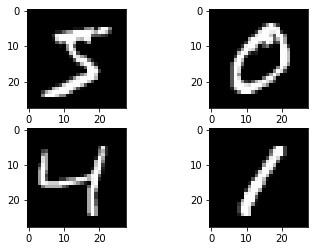

In [ ]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# define baseline model
def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
#  model.add(Dense(num_pixels/2, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [ ]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - loss: 0.2773 - accuracy: 0.9213 - val_loss: 0.1428 - val_accuracy: 0.9574 - 5s/epoch - 16ms/step
Epoch 2/10
300/300 - 4s - loss: 0.1112 - accuracy: 0.9674 - val_loss: 0.0972 - val_accuracy: 0.9719 - 4s/epoch - 14ms/step
Epoch 3/10
300/300 - 4s - loss: 0.0722 - accuracy: 0.9789 - val_loss: 0.0822 - val_accuracy: 0.9754 - 4s/epoch - 15ms/step
Epoch 4/10
300/300 - 4s - loss: 0.0503 - accuracy: 0.9855 - val_loss: 0.0693 - val_accuracy: 0.9790 - 4s/epoch - 14ms/step
Epoch 5/10
300/300 - 4s - loss: 0.0355 - accuracy: 0.9900 - val_loss: 0.0601 - val_accuracy: 0.9814 - 4s/epoch - 15ms/step
Epoch 6/10
300/300 - 4s - loss: 0.0268 - accuracy: 0.9932 - val_loss: 0.0618 - val_accuracy: 0.9809 - 4s/epoch - 15ms/step
Epoch 7/10
300/300 - 4s - loss: 0.0205 - accuracy: 0.9947 - val_loss: 0.0596 - val_accuracy: 0.9819 - 4s/epoch - 15ms/step
Epoch 8/10
300/300 - 4s - loss: 0.0149 - accuracy: 0.9964 - val_loss: 0.0605 - val_accuracy: 0.9813 - 4s/epoch - 15ms/step
Epoch 9/10
300/3

# 4. Derive the gradient for the given expressions

In [ ]:
# Calc the given expression 
A, x = [[1,0],[0,1]], np.array([2,3])

fxn = lambda A,x: 0.5*x.T @ A @ x
y = fxn(A, x)

Given $x=\begin{bmatrix}2\\3\end{bmatrix}$
 , and $A = \begin{bmatrix}a_{1} & a_{2}\\a_{3} & a_{4}\end{bmatrix}$

The quadratic equation can be generalized as a series of summations.

$$f(x) = 0.5\sum_{i=1}^n \sum_{j=1}^n x_{i}*A_{ij}*x_{j}$$

Since the lengths of x and A are equal (n = 2), can do the partial derivative w.r.t. matrix element k to compute the gradient.

$$f(x) = 0.5\sum_{i=1}^n (A_{ii}*x_{i}^2 + \sum_{j\neq i} x_{i}*A_{ij}*x_{j})$$
\
$$\nabla f(x) = 0.5\displaystyle \frac{\partial f}{\partial x_{k}}f(x) = 
0.5\binom{\frac{\partial f}{\partial x_{1}}}
      {\frac{\partial f}{\partial x_{2}}} 
= 0.5\binom{\sum_{j=1}^n x_{j}*A_{j1} + \sum_{j=1}^n A_{1j}*x_{j}}
{\sum_{j=1}^n x_{j}*A_{j2} + \sum_{j=1}^n A_{2j}*x_{j}}
= 0.5(A^T+A)x$$
\
If A is symmetric, i.e. $A_{ij} = A_{ji}$ then $A^T = A$ and the gradient becomes:\
$$\nabla f(x) = 0.5(A+A)x = Ax$$
